# $\text{AR}(1)$ with Offset

$\text{AR}(1)$ with a constant offset is defined by,

$
\begin{align}
X_t = \varphi X_{t-1} + \mu^* + \sigma \varepsilon_t
\end{align}
$

where, $\varepsilon \sim \text{Normal}(0,1)$

The stationarity requires $\lvert \varphi \rvert < 1$. The stationary mean and variance are given by,

$
\begin{align}
&\lim_{t \to \infty} \text{E}(X_t) = \frac{\mu^*}{1 - \varphi} \\
&\lim_{t \to \infty} \text{Var}(X_t) = \frac{\sigma^2}{1 - \varphi^2}
\end{align}
$

It follows that $X_t$ has distribution,

$
\begin{align}
X_t \sim \text{Normal}\left(  \frac{\mu}{1 - \varphi} ,  \frac{\sigma^2}{1 - \varphi^2} \right)
\end{align}
$


## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib.models import arima
from lib import (DataType, DataSchema, DataFunc, SourceType, DataSource, 
                 perform_est, EstType)
from lib import (DataPlotType, stack, curve, FuncPlotType, fcompare, CumuPlotType, cumulative)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
σ = 1.0
nsample = 1000

def cumu_mean_plot(φ, σ, μ, nsample, title):
    ar = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], μ=μ, σ=σ, xmax=nsample)
    data = DataFunc.apply_func_type(ar, DataType.CUMU_MEAN)
    cumulative(data, CumuPlotType.AR1_OFFSET_MEAN, title=title, title_offset=1.025, φ=φ, μ=μ)
    
def cumu_sd_plot(φ, σ, μ, nsample, title):
    ar = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], μ=μ, σ=σ, xmax=nsample)
    data = DataFunc.apply_func_type(ar, DataType.CUMU_SD)
    cumulative(data, CumuPlotType.AR1_OFFSET_SD, title=title, title_offset=1.025, φ=φ, σ=σ)
    
def comparison_plot_μ(μ_vals, ylim, title, *params):
    labels = [r"$μ^*=$" + f"{val}" for val in μ_vals]
    scan = DataSource.create_parameter_scan(SourceType.AR_OFFSET, *params)
    stack(scan, ylim=ylim, title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)
    
def comparison_plot_φ(φ_vals, ylim, title, *params):
    labels = [f"φ={val}" for val in φ_vals] 
    scan = DataSource.create_parameter_scan(SourceType.AR_OFFSET, *params)
    stack(scan, ylim=ylim, title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Simulation $\varphi$ Scan

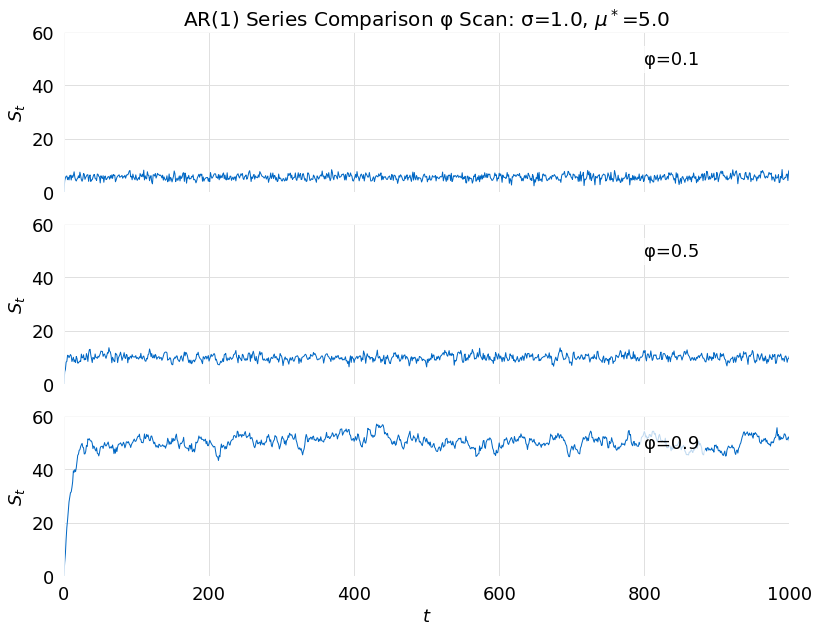

In [3]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, " + r"$μ^*$=" + f"{μ}"
φ_vals = [0.1, 0.5, 0.9]
params = [{"φ": [φ], "σ": σ, "μ": μ, "xmax": nsample} for φ in φ_vals]
comparison_plot_φ(φ_vals, [0.0, 60.0], title, *params)

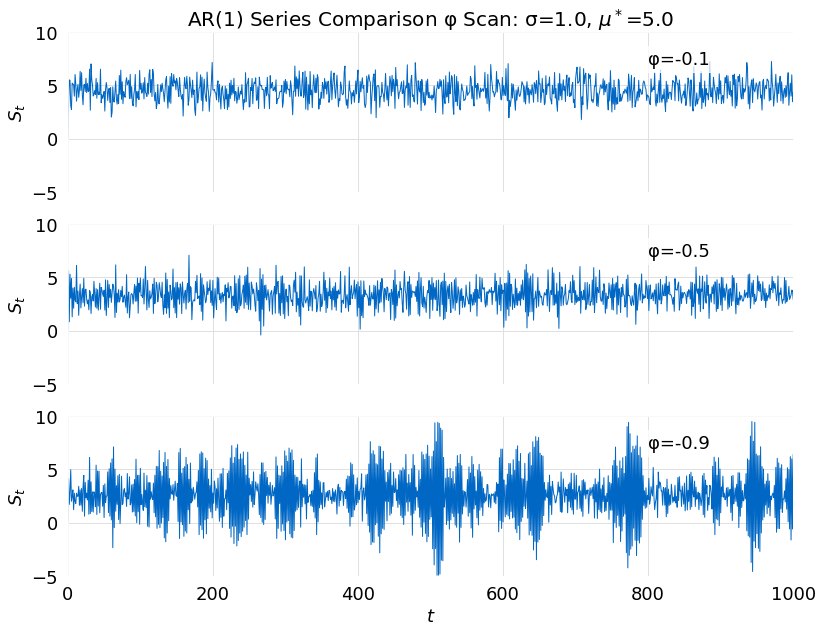

In [4]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, " + r"$μ^*$=" + f"{μ}"
φ_vals = [-0.1, -0.5, -0.9]
params = [{"φ": [φ], "σ": σ, "μ": μ, "xmax": nsample} for φ in φ_vals]
comparison_plot_φ(φ_vals, [-5.0, 10.0], title, *params)

## Simulation $\mu^*$ Scan

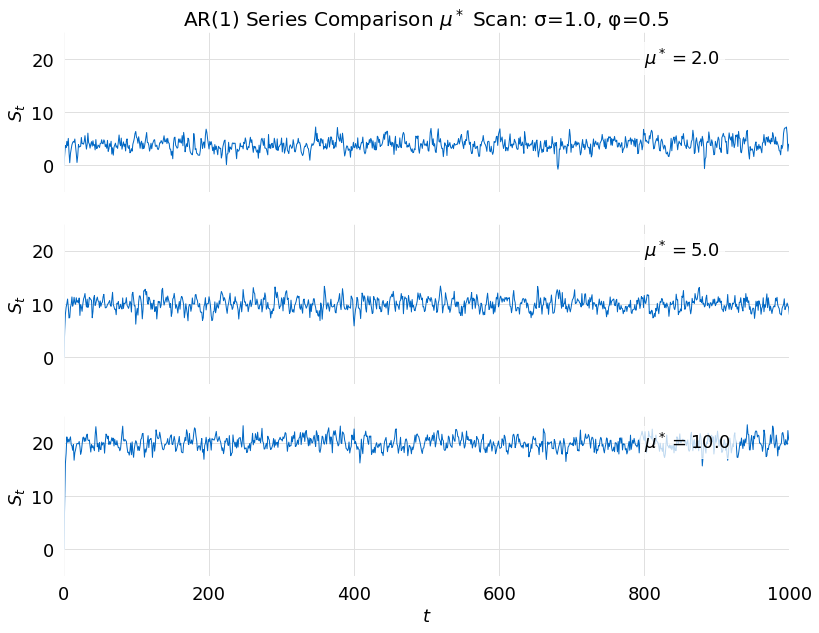

In [5]:
φ = 0.5
title = f"AR(1) Series Comparison " + r"$\mu^*$" + f" Scan: σ={σ}, φ={φ}"
μ_vals = [2.0, 5.0, 10.0]
params = [{"φ": [φ], "σ": σ, "μ": μ, "xmax": nsample} for μ in μ_vals]
comparison_plot_μ(μ_vals, [-5.0, 25.0], title, *params)

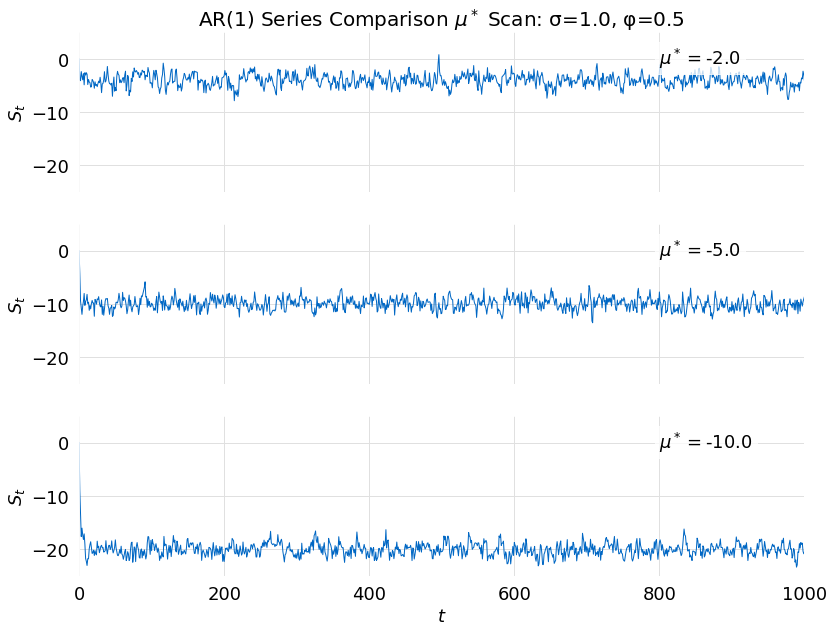

In [6]:
title = f"AR(1) Series Comparison " + r"$\mu^*$" + f" Scan: σ={σ}, φ={φ}"
μ_vals = [-2.0, -5.0, -10.0]
params = [{"φ": [φ], "σ": σ, "μ": μ, "xmax": nsample} for μ in μ_vals]
comparison_plot_μ(μ_vals, [-25.0, 5.0], title, *params)

## Mean

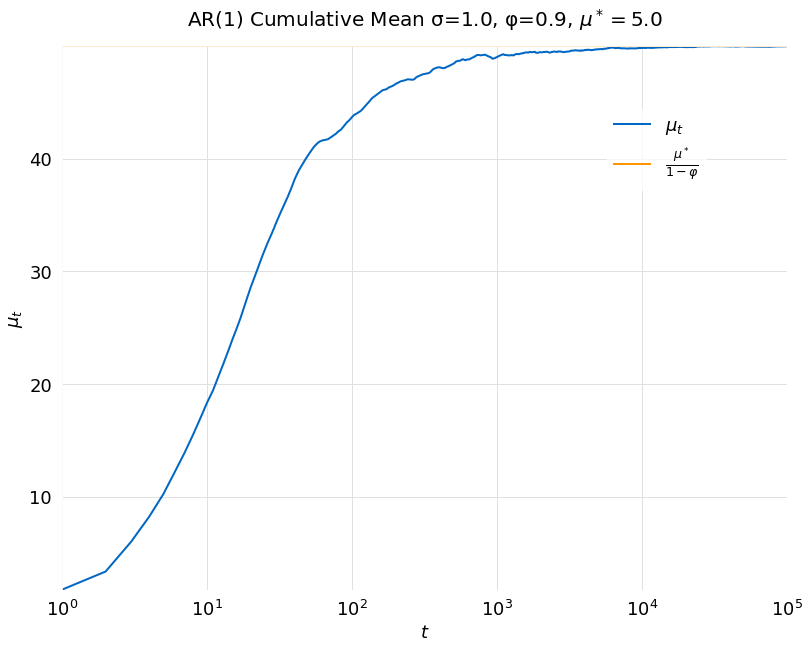

In [7]:
φ = 0.9
μ = 5.0
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
cumu_mean_plot(φ, σ, μ, nsample, title)

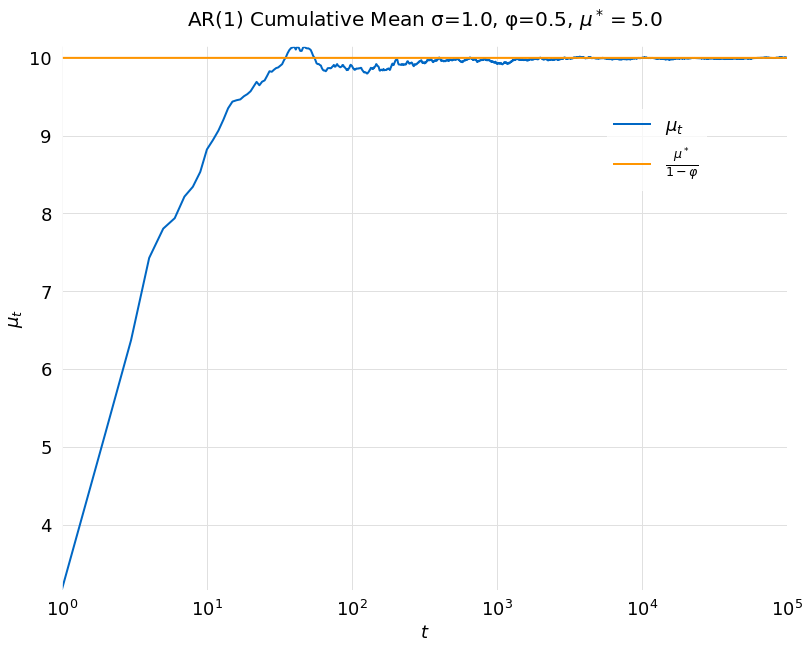

In [8]:
φ = 0.5
μ = 5.0
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
cumu_mean_plot(φ, σ, μ, nsample, title)

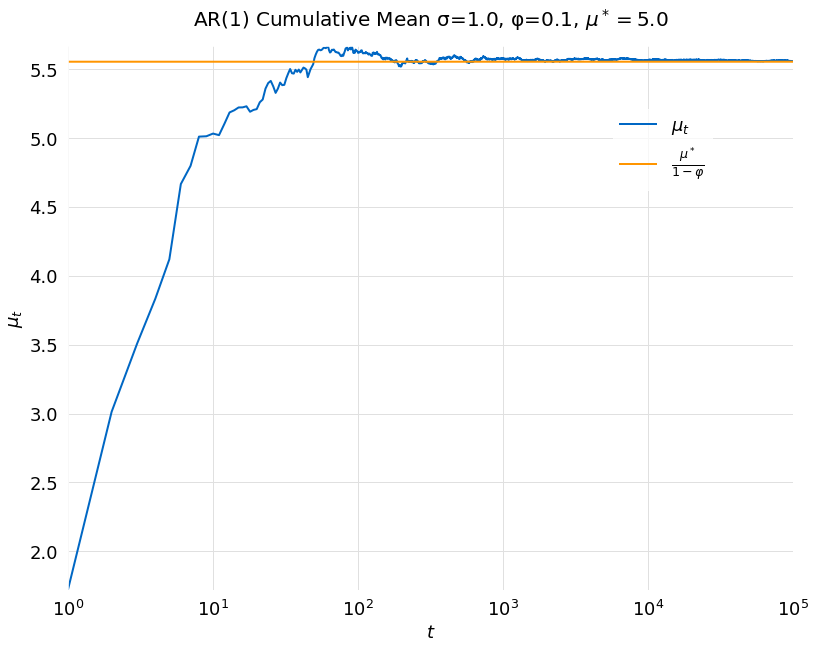

In [9]:
φ = 0.1
μ = 5.0
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
cumu_mean_plot(φ, σ, μ, nsample, title)

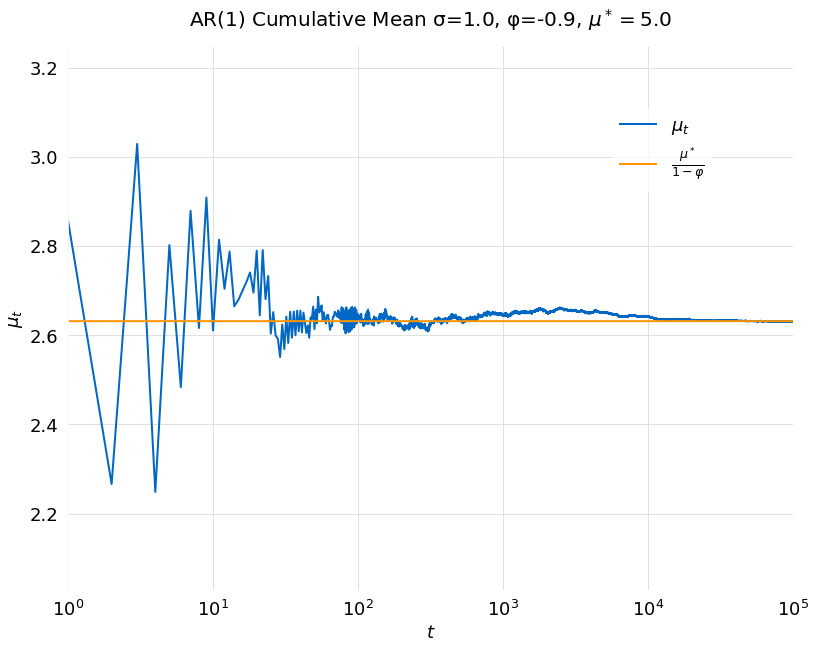

In [10]:
φ = -0.9
μ = 5.0
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
cumu_mean_plot(φ, σ, μ, nsample, title)

## Standard Deviation

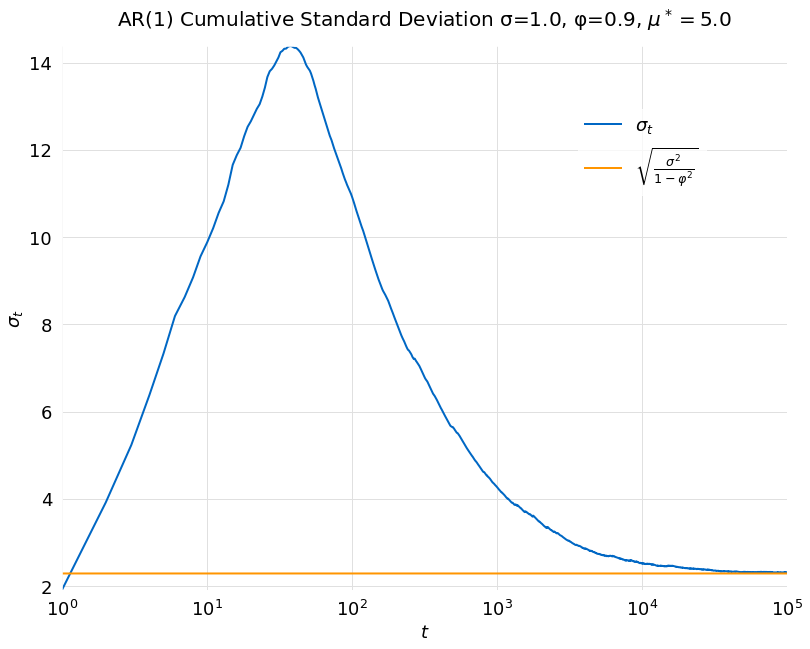

In [11]:
φ = 0.9
nsample = 100000
title = f"AR(1) Cumulative Standard Deviation σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
cumu_sd_plot(φ, σ, μ, nsample, title)

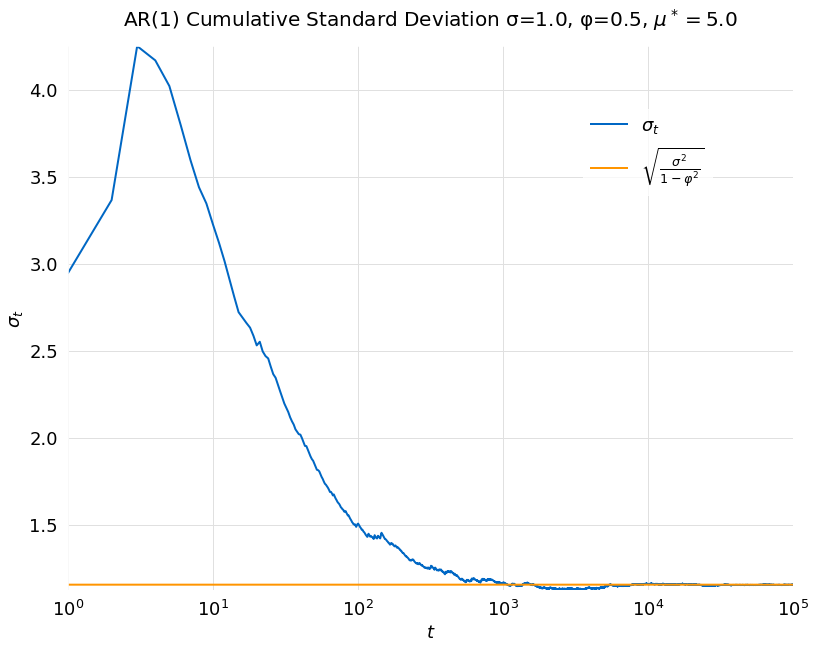

In [12]:
φ = 0.5
nsample = 100000
title = f"AR(1) Cumulative Standard Deviation σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
cumu_sd_plot(φ, σ, μ, nsample, title)

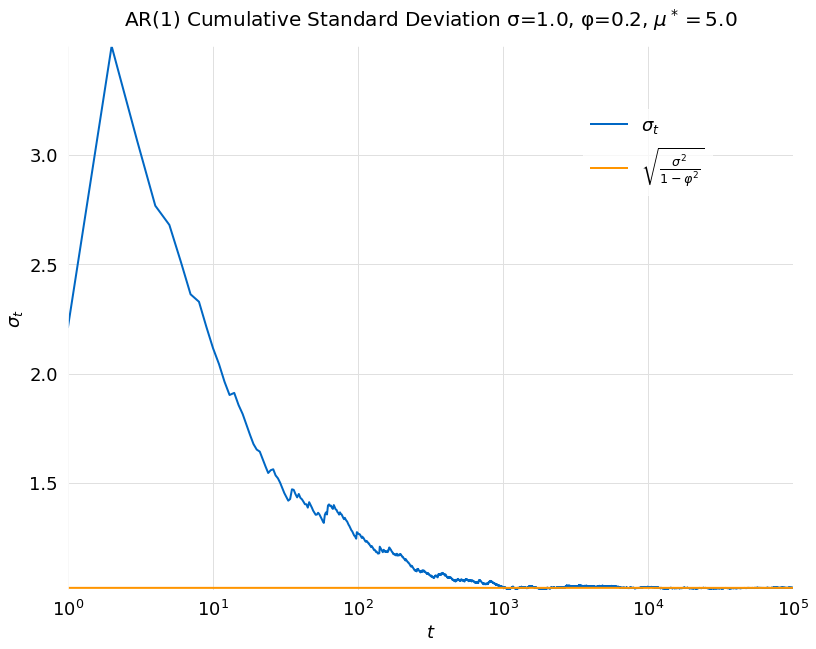

In [13]:
φ = 0.2
nsample = 100000
title = f"AR(1) Cumulative Standard Deviation σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
cumu_sd_plot(φ, σ, μ, nsample, title)

## Parameter Estimation

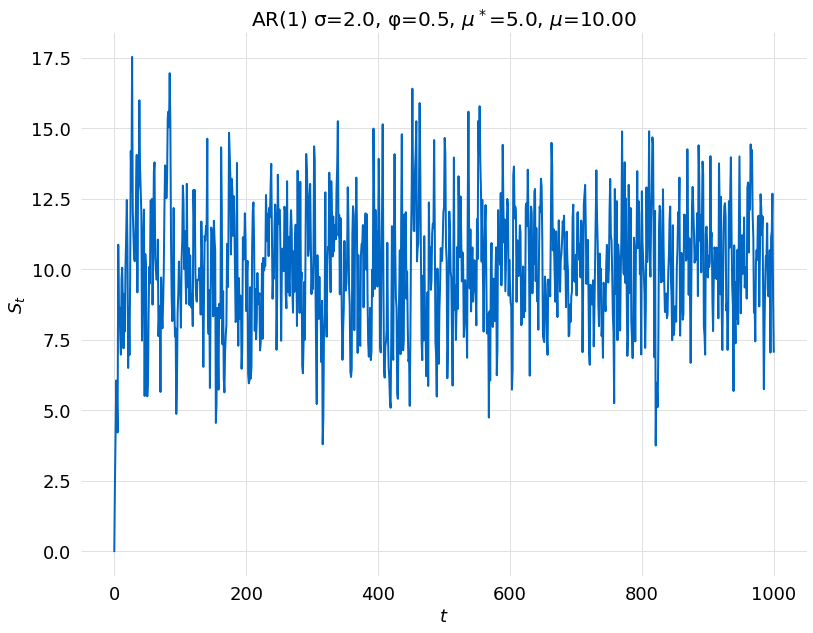

In [14]:
φ = 0.5
μ = 5.0
σ = 2.0
nsample = 1000
title = f"AR(1) σ={σ}, φ={φ}, " + r"$\mu^*$=" + f"{μ}," + r" $\mu$=" + f"{format(μ/(1.0-φ), '4.2f')}"
df = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], μ=μ, σ=σ, xmax=nsample)
curve(df, plot_type=DataPlotType.TIME_SERIES, title=title)

In [15]:
results = perform_est(df, EstType.AR_OFFSET, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2090.701
Date:                Wed, 11 May 2022   AIC                           4187.402
Time:                        07:45:15   BIC                           4202.128
Sample:                             0   HQIC                          4192.998
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0490      0.122     82.052      0.000       9.809      10.289
ar.L1          0.5032      0.026     19.537      0.000       0.453       0.554
sigma2         3.8154      0.160     23.850      0.000       3.502       4.129
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.33
Prob(Q):                              0.96   Prob(JB):                         0.19
Heteroskedasticity (H):               0.79   Skew:                             0.03
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
df.attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.5], 'μ': 5.0, 'σ': 2.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Estimates': {'AR_OFFSET(1)': {'Type': <EstType.AR_OFFSET: 'AR_OFFSET'>,
    'Const': [10.04902223497146, 0.12247176644955708],
    'Parameters': [[0.5032244239242953, 0.025757035563580354]],
    'Sigma2': [3.8154037046397193, 0.15997700412813246]}},
  'Tests': {}},
 'Date': '11/05/2022 07:45:15',
 'Name': 'ARMA-Simulation-94b0423c-7765-49e8-bab9-5f8d5fdd6ace'}

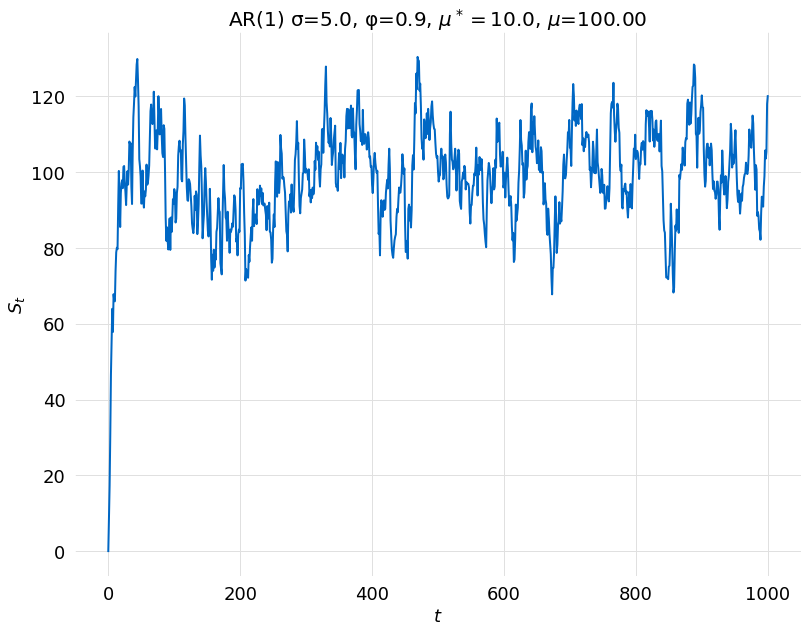

In [17]:
φ = 0.9
μ = 10.0
σ = 5.0
nsample = 1000
title = f"AR(1) σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}," + r" $\mu$=" + f"{format(μ/(1.0-φ), '4.2f')}"
df = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], μ=μ, σ=σ, xmax=nsample)
curve(df, plot_type=DataPlotType.TIME_SERIES, title=title)

In [18]:
results = perform_est(df, EstType.AR_OFFSET, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3021.078
Date:                Wed, 11 May 2022   AIC                           6048.155
Time:                        07:45:16   BIC                           6062.882
Sample:                             0   HQIC                          6053.752
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.1942      3.178     30.579      0.000      90.964     103.424
ar.L1          0.9528      0.004    218.274      0.000       0.944       0.961
sigma2        24.4309      1.052     23.218      0.000      22.369      26.493
===================================================================================
Ljung-Box (L1) (Q):                   2.40   Jarque-Bera (JB):                58.96
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
df.attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.9], 'μ': 10.0, 'σ': 5.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Estimates': {'AR_OFFSET(1)': {'Type': <EstType.AR_OFFSET: 'AR_OFFSET'>,
    'Const': [97.19415939190391, 3.1784748140722],
    'Parameters': [[0.9527762551593244, 0.004365038812043187]],
    'Sigma2': [24.430940640048092, 1.0522565475559535]}},
  'Tests': {}},
 'Date': '11/05/2022 07:45:15',
 'Name': 'ARMA-Simulation-438738cd-f28f-45a2-ab01-9ce74baea483'}

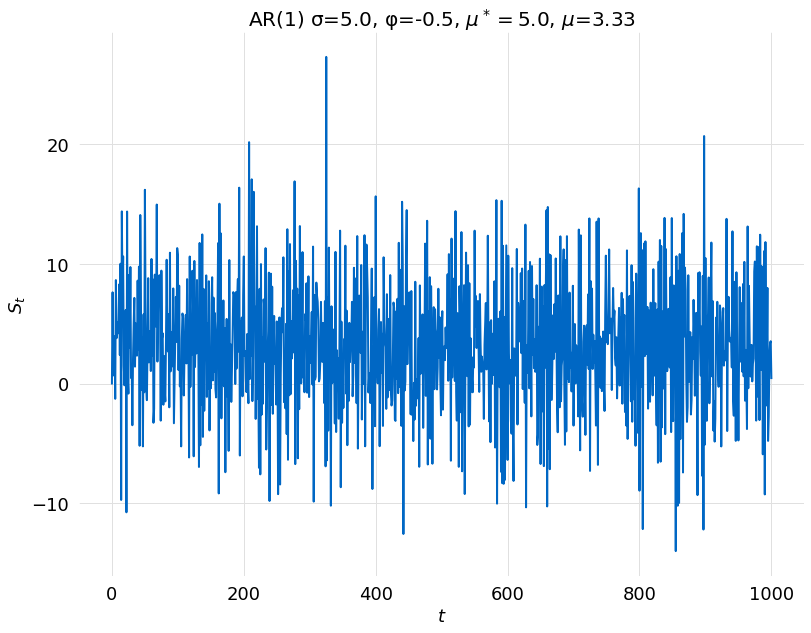

In [20]:
φ = -0.5
μ = 5.0
nsample = 1000
title = f"AR(1) σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}," + r" $\mu$=" + f"{format(μ/(1.0-φ), '4.2f')}"
df = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], μ=μ, σ=σ, xmax=nsample)
curve(df, plot_type=DataPlotType.TIME_SERIES, title=title)

In [21]:
results = perform_est(df, EstType.AR_OFFSET, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3032.724
Date:                Wed, 11 May 2022   AIC                           6071.448
Time:                        07:45:16   BIC                           6086.174
Sample:                             0   HQIC                          6077.045
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1250      0.111     28.142      0.000       2.907       3.343
ar.L1         -0.4253      0.028    -15.033      0.000      -0.481      -0.370
sigma2        25.0610      1.090     23.000      0.000      22.925      27.197
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.77
Prob(Q):                              0.96   Prob(JB):                         0.68
Heteroskedasticity (H):               0.96   Skew:                             0.03
Prob(H) (two-sided):                  0.71   Kurtosis:                         3.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
df.attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [-0.5], 'μ': 5.0, 'σ': 5.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Estimates': {'AR_OFFSET(1)': {'Type': <EstType.AR_OFFSET: 'AR_OFFSET'>,
    'Const': [3.125039008905394, 0.11104644475520971],
    'Parameters': [[-0.42533997648959826, 0.028294468614833097]],
    'Sigma2': [25.060992671655818, 1.0896192373042293]}},
  'Tests': {}},
 'Date': '11/05/2022 07:45:16',
 'Name': 'ARMA-Simulation-67f68ccd-8707-48f2-9af5-367ffb903054'}